In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/Rotten_Tomatoes_Movies[2].csv")

In [3]:
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0


In [4]:
df.isnull().sum()

,0
movie_title,0
movie_info,24
critics_consensus,8329
rating,0
genre,17
directors,114
writers,1349
cast,284
in_theaters_date,815
on_streaming_date,2


In [5]:
df = df.dropna(subset=['critics_consensus'])

In [6]:
df = df.copy()
df['genre'] = df['genre'].fillna(df['genre'].mode()[0])

In [7]:
df.isnull().sum()

,0
movie_title,0
movie_info,1
critics_consensus,0
rating,0
genre,0
directors,42
writers,432
cast,70
in_theaters_date,121
on_streaming_date,0


**DISTRIBUTION OF FILMS BY RATING**

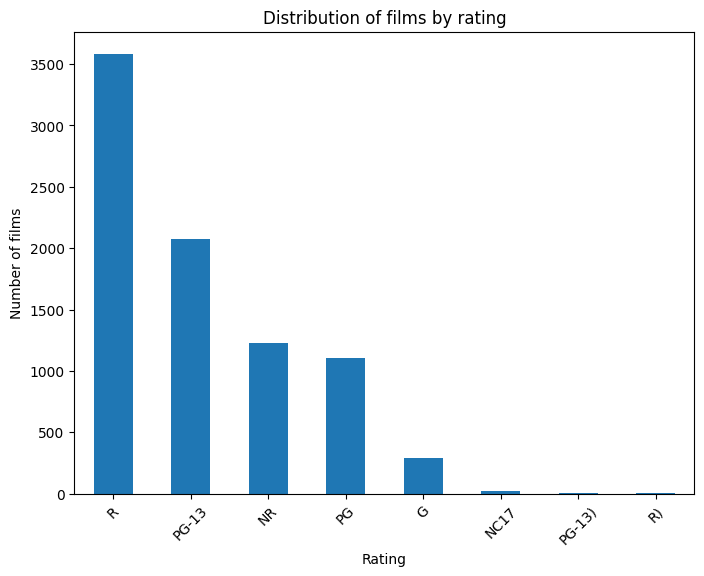

In [8]:
import matplotlib.pyplot as plt

rating_counts = df['rating'].value_counts()

plt.figure(figsize=(8,6))
rating_counts.plot(kind="bar")
plt.title("Distribution of films by rating")
plt.xlabel("Rating")
plt.ylabel("Number of films")
plt.xticks(rotation=45)
plt.show()

**DISTRIBUTION OF FILMS BY PRIMARY GENRE**

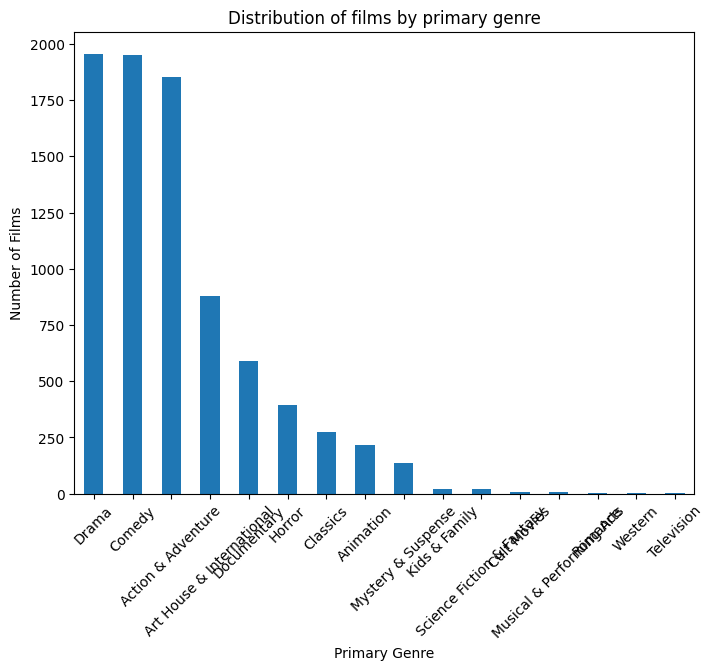

In [9]:
df['primary_genre'] = df['genre'].str.split(",").str[0]
genre_counts = df['primary_genre'].value_counts()

plt.figure(figsize=(8,6))
genre_counts.plot(kind="bar")
plt.title('Distribution of films by primary genre')
plt.xlabel('Primary Genre')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.show()

**DISTRIBUTION OF FILMS BY TOMATOMETER RATING**

In [10]:
status_counts = df['tomatometer_status'].value_counts()
status_pct = (status_counts / len(df)) * 100

certified_fresh_pct = status_pct.get("Certified Fresh", 0)
rotten_pct = status_pct.get("Rotten", 0)

print(f"Certified Fresh: {certified_fresh_pct:.2f}%")
print(f"Rotten: {rotten_pct:.2f}%")

Certified Fresh: 34.64%
Rotten: 40.82%


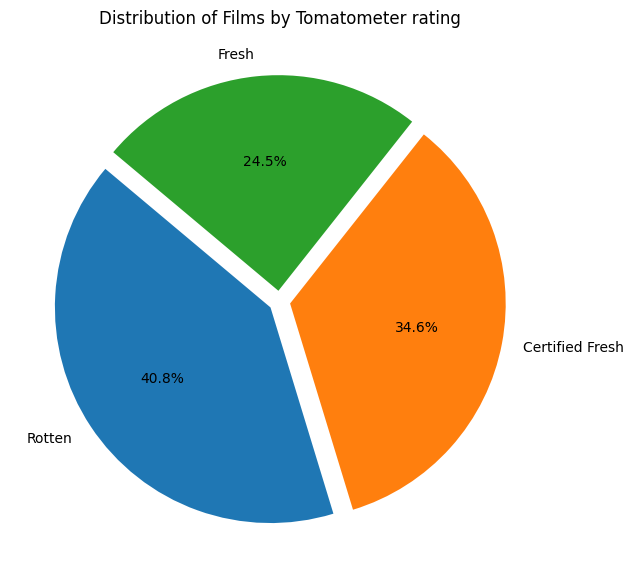

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.pie(status_counts, labels=status_counts.index, autopct="%1.1f%%", startangle=140, explode=[0.05] * len(status_counts))
plt.title("Distribution of Films by Tomatometer rating")
plt.show()

**AVERAGE TOMATOMETER RATING**

In [12]:
studio_stats = df.groupby("studio_name").agg(
                film_count = ("tomatometer_rating", "count"),
                avg_rating = ("tomatometer_rating", "mean"),
                ).sort_values(by="avg_rating", ascending=False)

top_studios = studio_stats[studio_stats["film_count"] >= 5].head(5)
print("Top 5 studios by Average Tomatometer rating:")
print(top_studios)

bottom_studios = studio_stats[studio_stats["film_count"] >= 5].tail(5)
print("\nBottom 5 studios by Average Tomatometer rating:")
print(bottom_studios)

Top 5 studios by Average Tomatometer rating:
                      film_count  avg_rating
studio_name                                 
Janus Films                   14   94.928571
Rialto Pictures               15   94.200000
Disney/Pixar                   6   93.000000
Criterion Collection          28   92.964286
The Cinema Guild               7   92.142857

Bottom 5 studios by Average Tomatometer rating:
                         film_count  avg_rating
studio_name                                    
Screen Gems                      31   29.645161
Hollywood Pictures               14   29.142857
Fox Atomic                        6   28.666667
Sony/Screen Gems                  7   28.000000
RLJ/Image Entertainment           5   26.400000


In [13]:
df['rating_diff'] = (df['tomatometer_rating'] - df['audience_rating']).abs()
discrepancies = df[['movie_title','tomatometer_rating','audience_rating','rating_diff']] \
                 .sort_values(by='rating_diff', ascending=False)
print(discrepancies.head(10))


                                             movie_title  tomatometer_rating  \
8564                                Knock Down the House                 100   
7044                              Hannah Gadsby: Nanette                 100   
10846                                           Out Cold                   8   
7339   Hillary's America: The Secret History of the D...                   4   
2510              America: Imagine the World Without Her                   8   
13130                                          Stonewall                  10   
2598                                 Amy Schumer Growing                  79   
9915                                          Modigliani                   4   
2601                                  An Acceptable Loss                  13   
5897                                   Facing the Giants                  13   

       audience_rating  rating_diff  
8564              17.0         83.0  
7044              22.0         78.0  
10846

In [14]:
df['diff_signed'] = df['tomatometer_rating'] - df['audience_rating']
critics_higher = df.sort_values(by='diff_signed', ascending = False).head(10)
audience_higher = df.sort_values(by='diff_signed',ascending = True).head(10)
print("Critics liked more:\n", critics_higher[['movie_title', 'tomatometer_rating', 'audience_rating']])
print("\n Audience liked more:", audience_higher[['movie_title', 'tomatometer_rating', 'audience_rating']])

Critics liked more:
                                           movie_title  tomatometer_rating  \
8564                             Knock Down the House                 100   
7044                           Hannah Gadsby: Nanette                 100   
2598                              Amy Schumer Growing                  79   
12279                               See You Yesterday                  95   
4341                            Chris Rock: Tamborine                 100   
7001           Hale County This Morning, This Evening                  97   
14885                                    The Souvenir                  90   
8897   Let the Sunshine In (Un beau soleil intérieur)                  86   
9918                                           Mohawk                  83   
6992         Hagazussa: A Heathen's Curse (Hagazussa)                  95   

       audience_rating  
8564              17.0  
7044              22.0  
2598               4.0  
12279             30.0  
4341  

**NLP STYLE TEXT ANALYSIS**

In [15]:
import re
import nltk
nltk.download('stopwords')
from collections import Counter
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:

df['clean_consensus'] = df['critics_consensus'].str.lower().apply(lambda x: re.sub(r'[^a-z\s]','',x))
stop_words = set(stopwords.words('english'))
df['tokens'] = df['clean_consensus'].apply(lambda x: [word for word in x.split() if word not in stop_words])

In [17]:
all_words = [word for tokens in df['tokens'] for word in tokens]
word_freq = Counter(all_words)
print(word_freq.most_common(20))

[('story', 729), ('cast', 635), ('performances', 628), ('performance', 594), ('film', 489), ('movie', 486), ('enough', 476), ('comedy', 464), ('may', 420), ('offers', 398), ('drama', 392), ('thriller', 371), ('director', 366), ('action', 356), ('plot', 349), ('characters', 346), ('though', 337), ('funny', 328), ('one', 316), ('make', 311)]


In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [19]:
sia = SentimentIntensityAnalyzer()
df['consensus_sentiment'] = df['critics_consensus'].dropna().apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [20]:
def classify_sentiment(score):
  if score >= 0.05:
    return "Positive"
  elif score <= 0.05:
    return "Negative"
  else:
    return "Neutral"

df['sentiment_label'] = df['consensus_sentiment'].apply(classify_sentiment)
print(df['sentiment_label'].value_counts())

sentiment_label
Positive    5405
Negative    2904
Name: count, dtype: int64


In [21]:
def clean_and_tokenize(text):
  text = text.lower()
  text = re.sub(r'[^a-z\s]','',text)
  return [w for w in text.split() if w not in stopwords.words('english')]

positive_words = []
negative_words = []

for text, sentiment in zip(df['critics_consensus'], df['sentiment_label']):
  if pd.notna(text):
    tokens = clean_and_tokenize(text)
    if sentiment == 'Positive':
      positive_words.extend(tokens)
    if sentiment == 'Negative':
      negative_words.extend(tokens)

print("Most common positive words:", Counter(positive_words).most_common(20))
print("Most common negative words:", Counter(negative_words).most_common(20))

Most common positive words: [('story', 497), ('performances', 481), ('cast', 480), ('performance', 455), ('comedy', 387), ('enough', 337), ('film', 316), ('may', 304), ('movie', 280), ('offers', 279), ('funny', 272), ('drama', 269), ('director', 255), ('strong', 247), ('thriller', 242), ('entertaining', 236), ('though', 234), ('make', 230), ('one', 219), ('action', 218)]
Most common negative words: [('story', 232), ('movie', 206), ('horror', 182), ('film', 173), ('plot', 165), ('cast', 155), ('performances', 147), ('characters', 143), ('performance', 139), ('enough', 139), ('action', 138), ('thriller', 129), ('despite', 125), ('drama', 123), ('offers', 119), ('may', 116), ('director', 111), ('genre', 105), ('though', 103), ('look', 99)]


In [22]:
df['primary_genre'] = df['genre'].astype(str).apply(lambda x: x.split(',')[0].strip())

In [26]:
genre_sentiment = df.groupby(['primary_genre','sentiment_label']).size().unstack(fill_value=0)

genre_sentiment['Total'] = genre_sentiment.sum(axis=1)
genre_sentiment['Positive'] = (genre_sentiment['Positive'] / genre_sentiment['Total']) * 100
genre_sentiment['Negative'] = (genre_sentiment['Negative'] / genre_sentiment['Total']) * 100

genre_sentiment = genre_sentiment.sort_values(by='Positive', ascending=False)
print(genre_sentiment.head(10))

sentiment_label             Negative    Positive  Total
primary_genre                                          
Romance                     0.000000  100.000000      3
Animation                  13.425926   86.574074    216
Kids & Family              19.047619   80.952381     21
Science Fiction & Fantasy  25.000000   75.000000     20
Comedy                     27.459016   72.540984   1952
Classics                   28.832117   71.167883    274
Musical & Performing Arts  33.333333   66.666667      6
Art House & International  33.523375   66.476625    877
Documentary                36.332767   63.667233    589
Drama                      36.451943   63.548057   1956


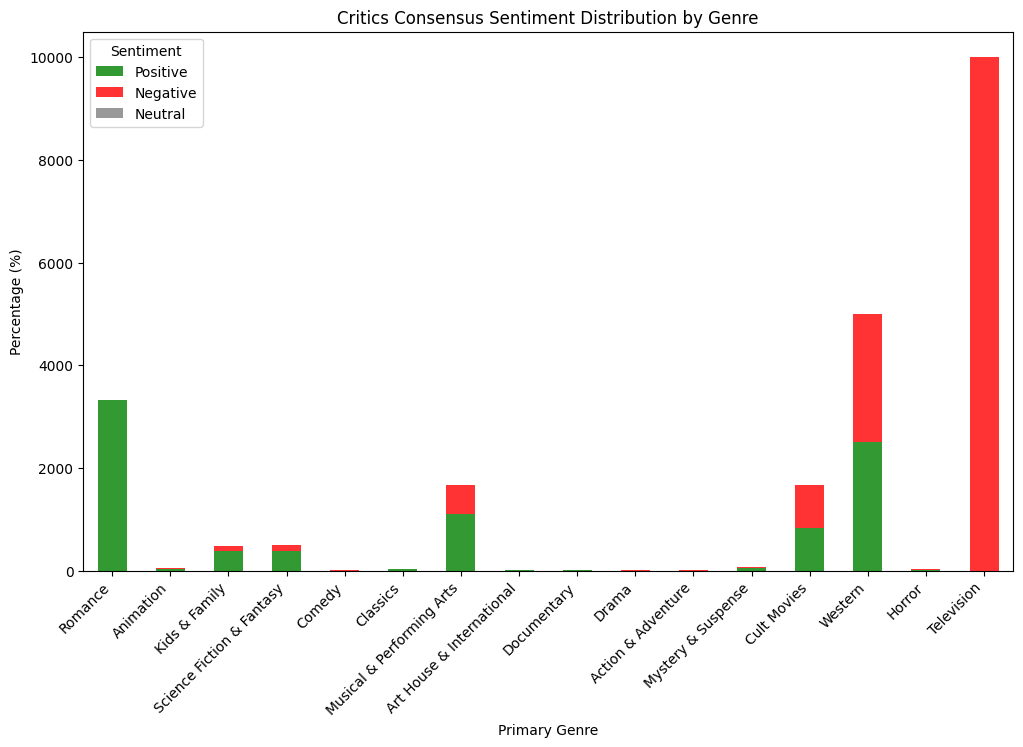

In [27]:
import matplotlib.pyplot as plt

if 'Neutral' not in genre_sentiment.columns:
    genre_sentiment['Neutral'] = 0

genre_pct = genre_sentiment[['Positive', 'Negative', 'Neutral']].div(genre_sentiment['Total'], axis=0) * 100

genre_pct.plot(kind='bar', stacked=True, figsize=(12,7),
               color=['green','red','gray'], alpha=0.8)

plt.title("Critics Consensus Sentiment Distribution by Genre")
plt.ylabel("Percentage (%)")
plt.xlabel("Primary Genre")
plt.legend(title="Sentiment")
plt.xticks(rotation=45, ha='right')
plt.show()
